In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

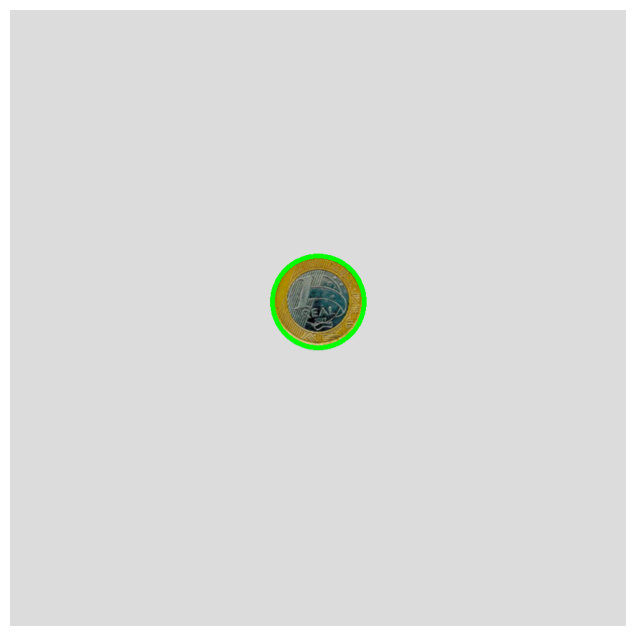

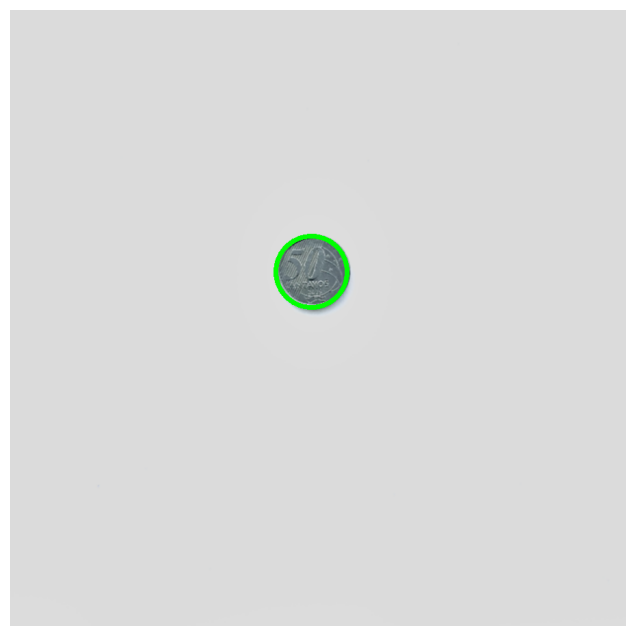

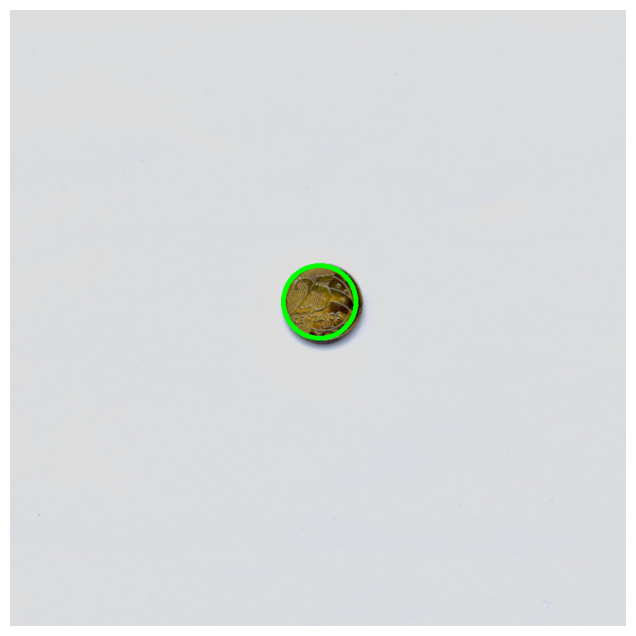

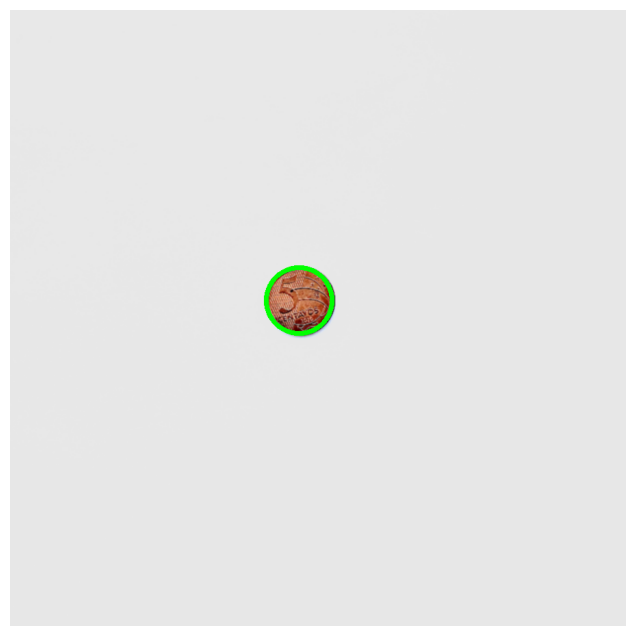

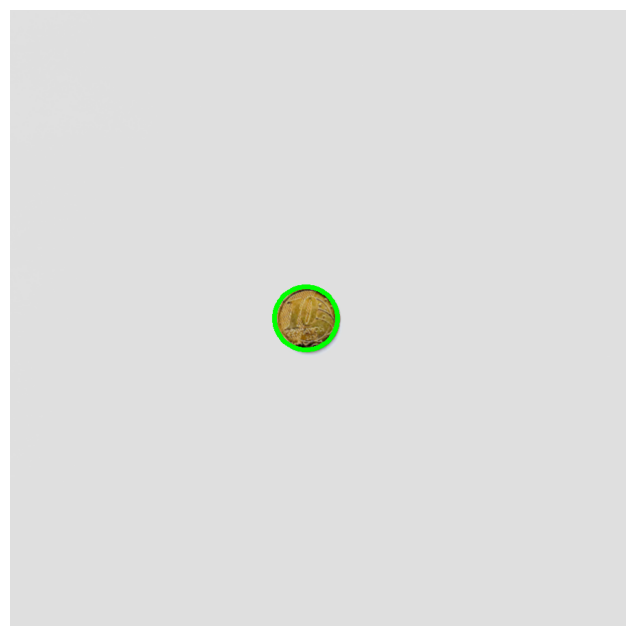

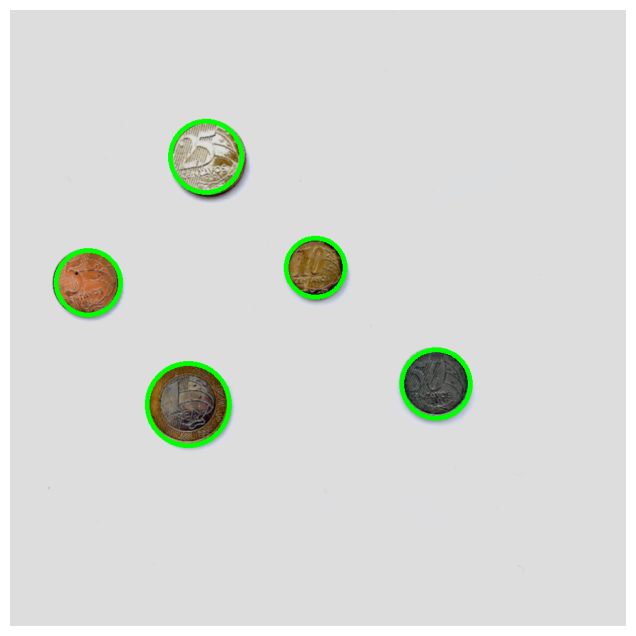

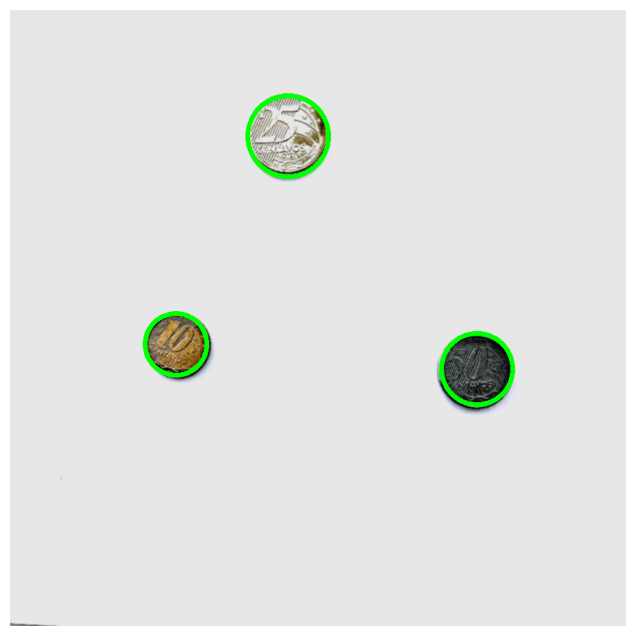

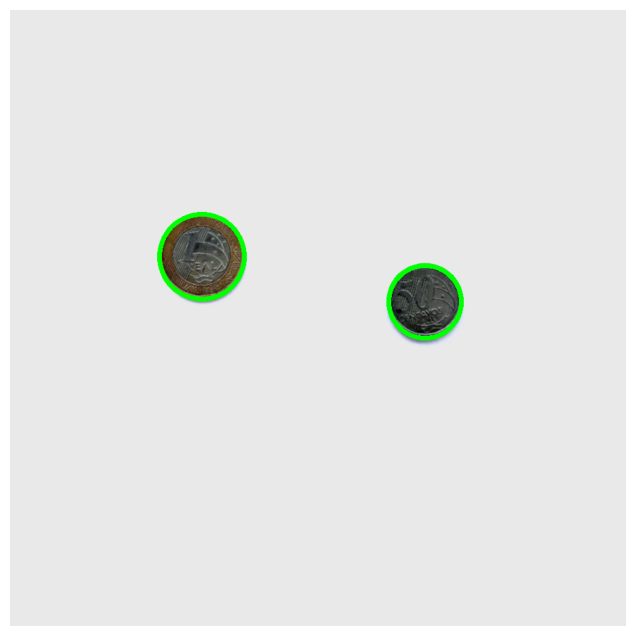

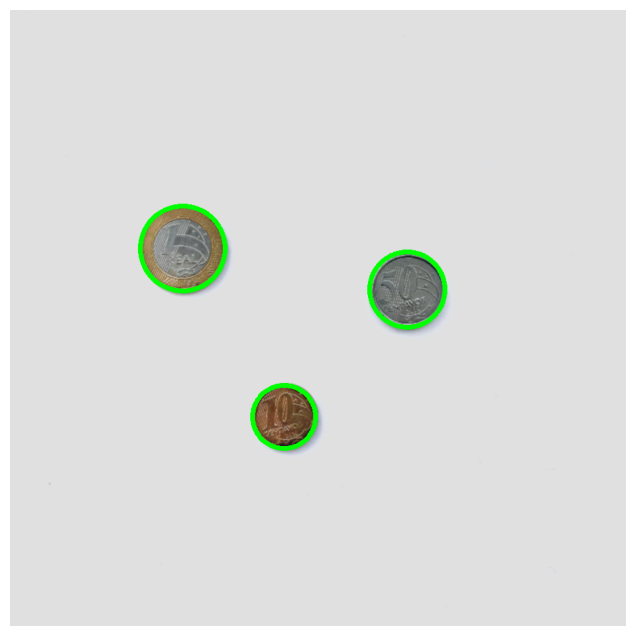

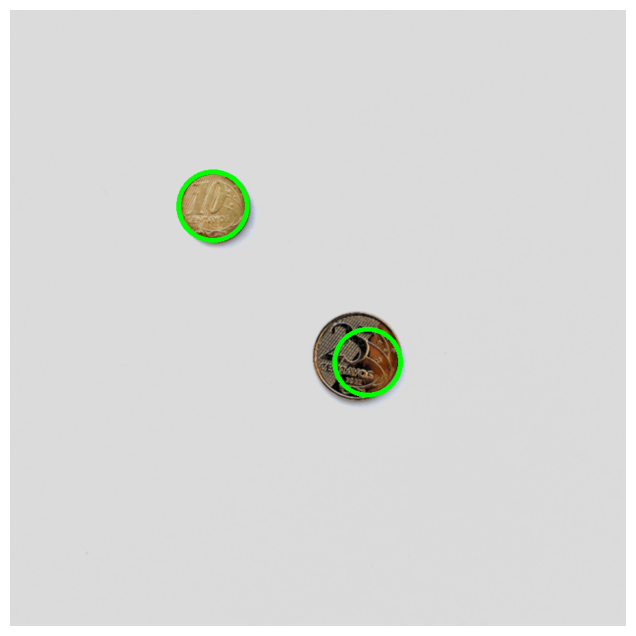

In [8]:
for i in range(10):
    img = cv2.imread(f'images/img{i}.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (900, 900))
    img = cv2.GaussianBlur(img, (3,3), 0)
    img_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(img_g, 200, 400)
    circles = cv2.HoughCircles(img_g, cv2.HOUGH_GRADIENT, 1, 30, param1=300, param2=60)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            img = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 6)
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

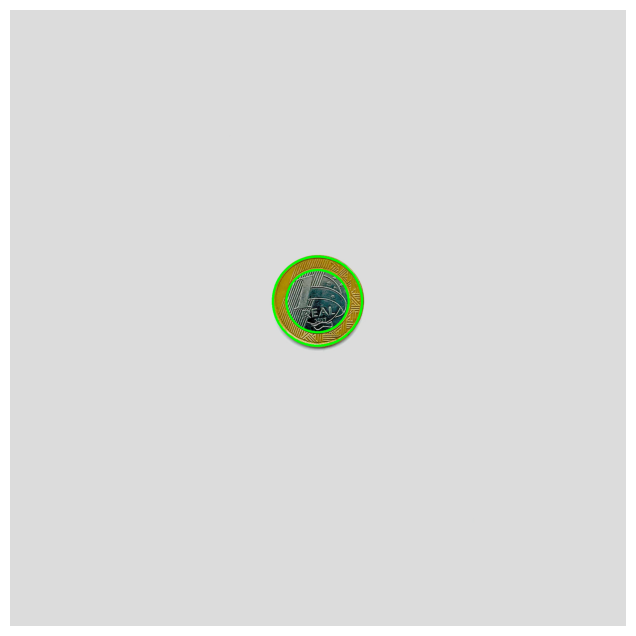

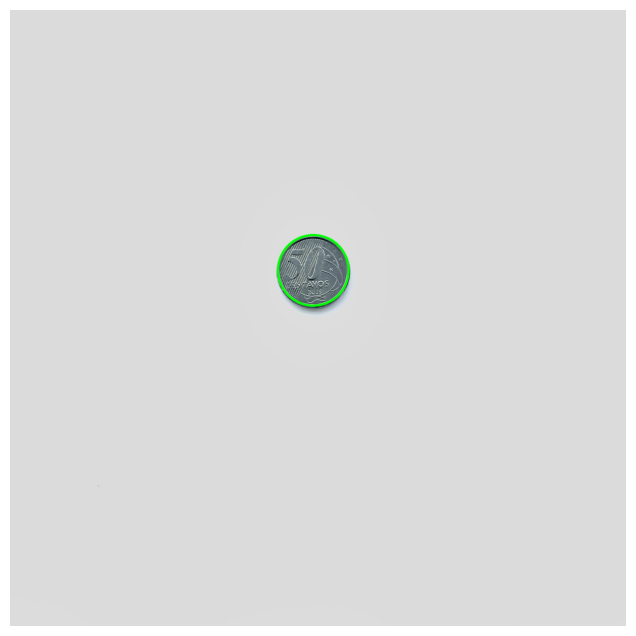

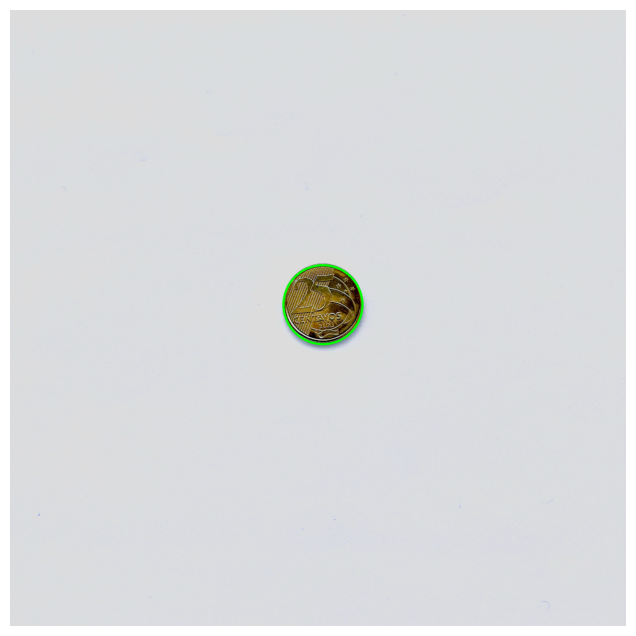

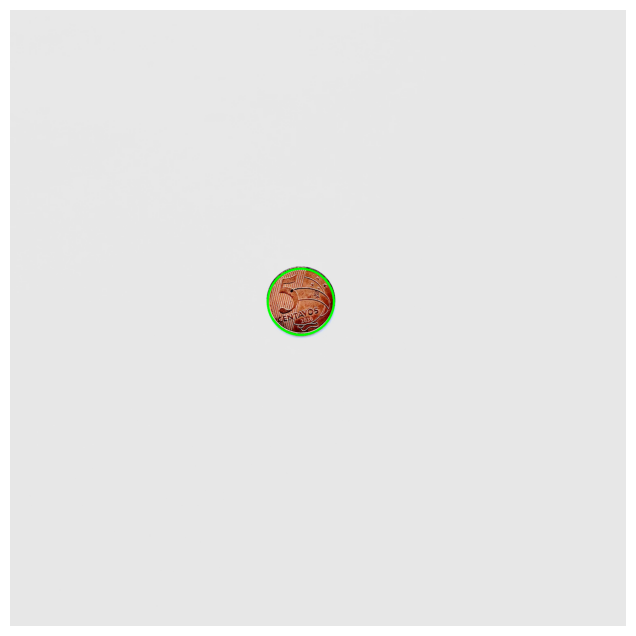

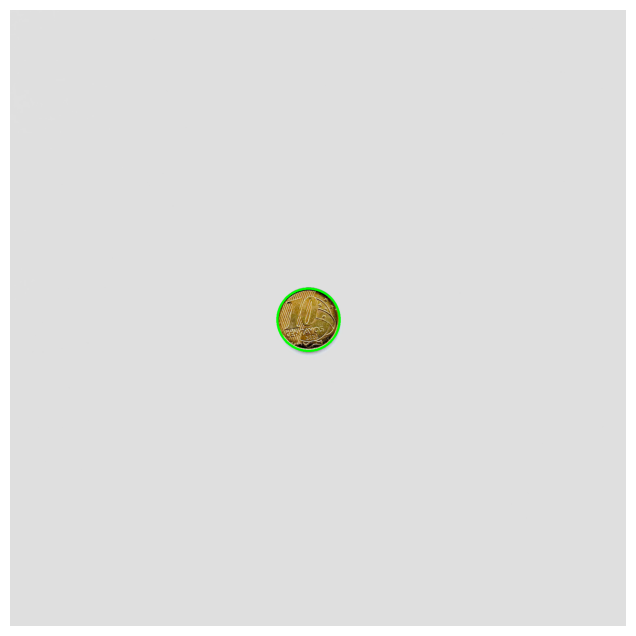

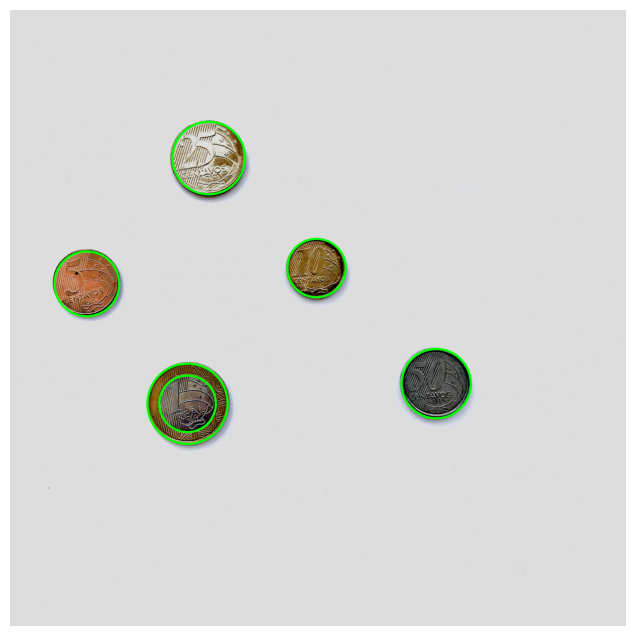

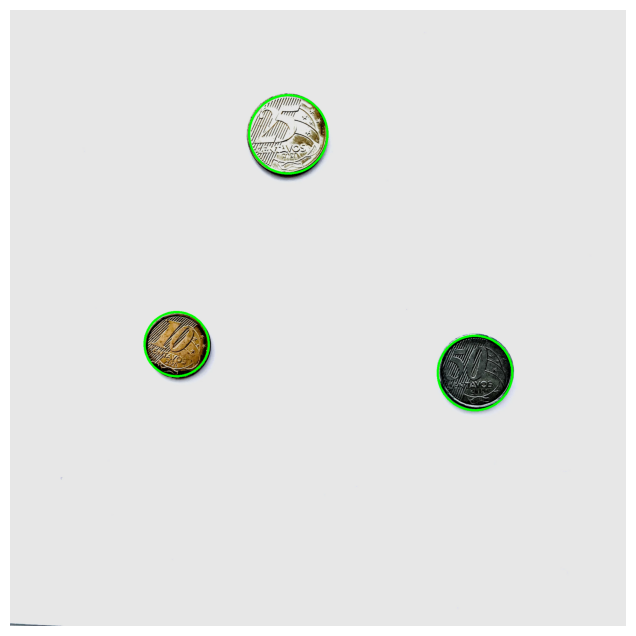

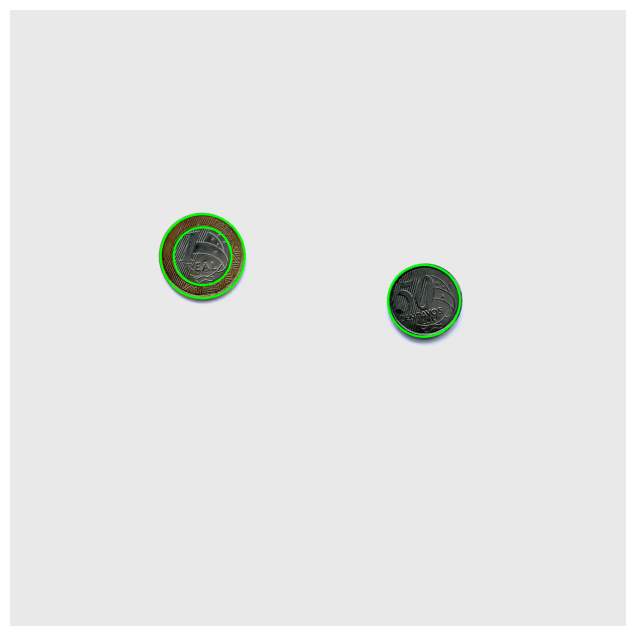

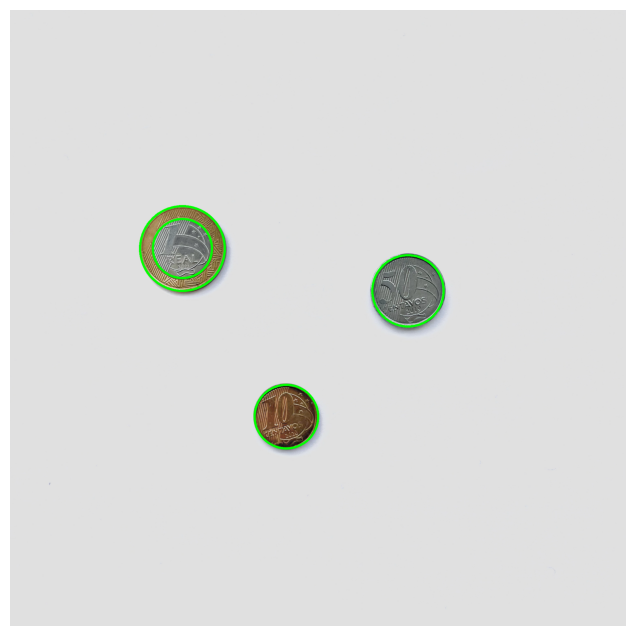

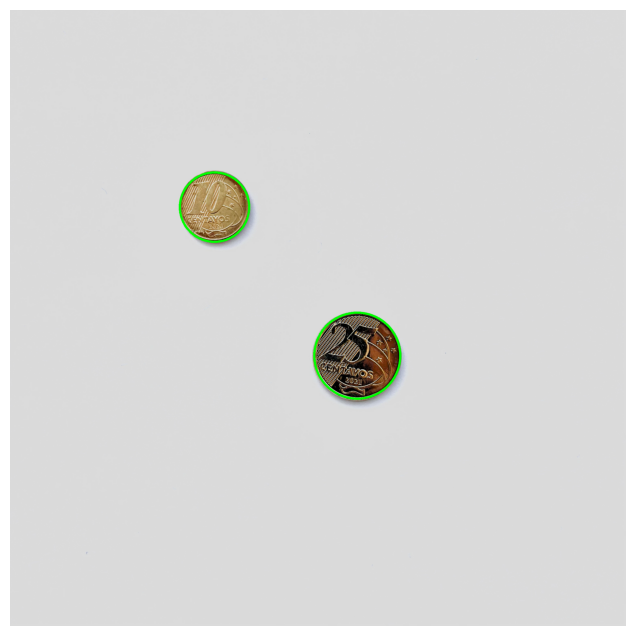

In [22]:
for i in range(10):
    img = cv2.imread(f'images/img{i}.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (1920, 1920))
    #img = cv2.GaussianBlur(img, (3,3), 0)
    img_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(img_g, 200, 400)
    circles = cv2.HoughCircles(img_g, cv2.HOUGH_GRADIENT_ALT, 1, 30, param1=300, param2=0.9)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            img = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 6)
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.show()

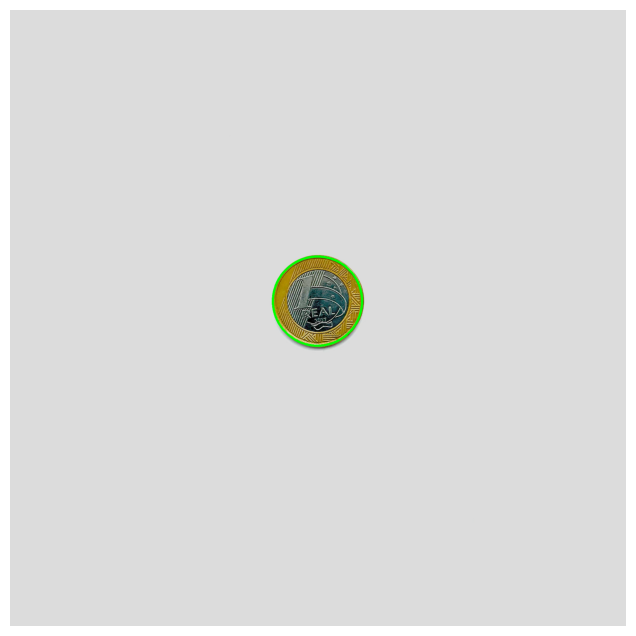

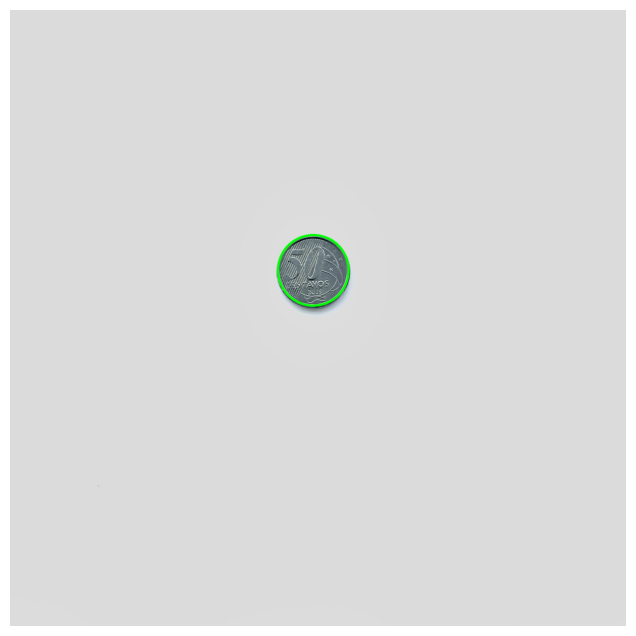

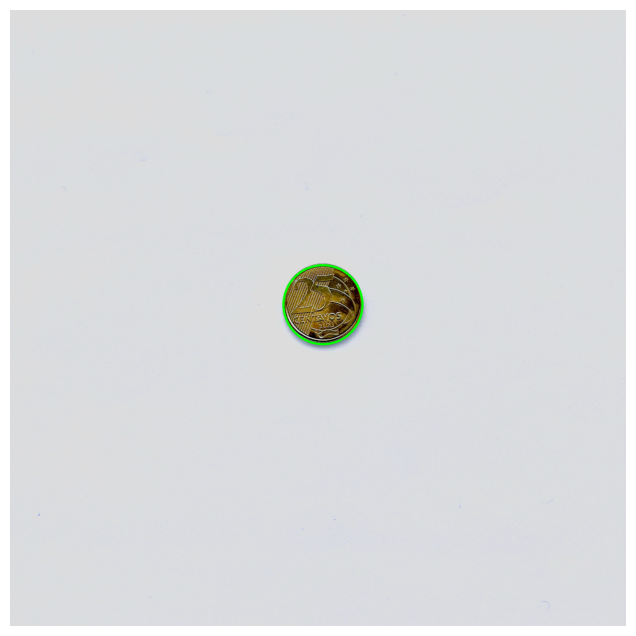

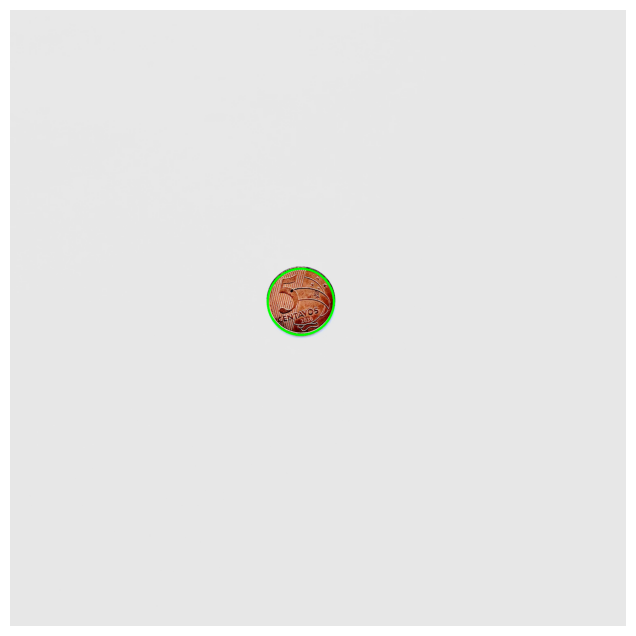

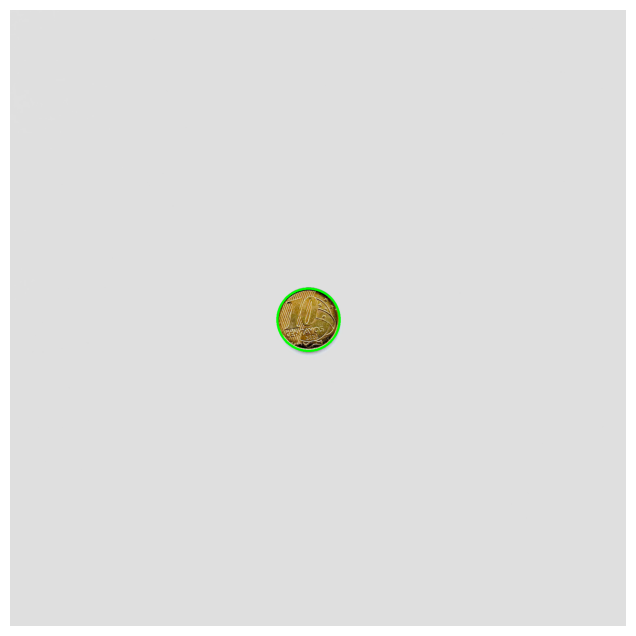

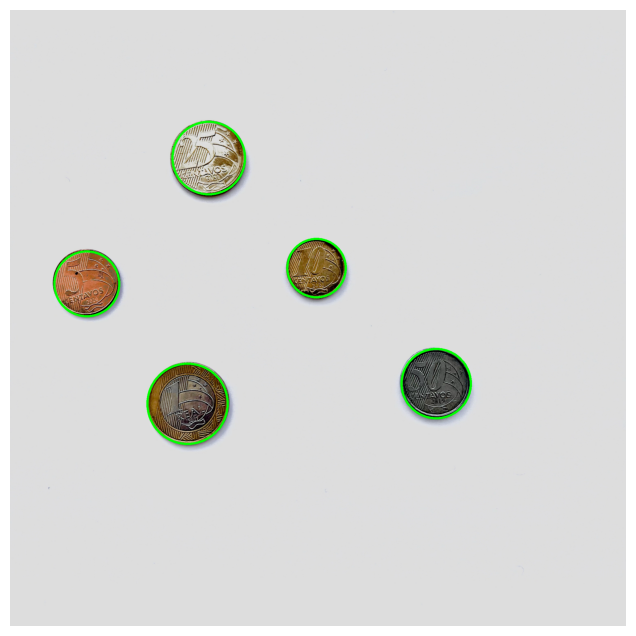

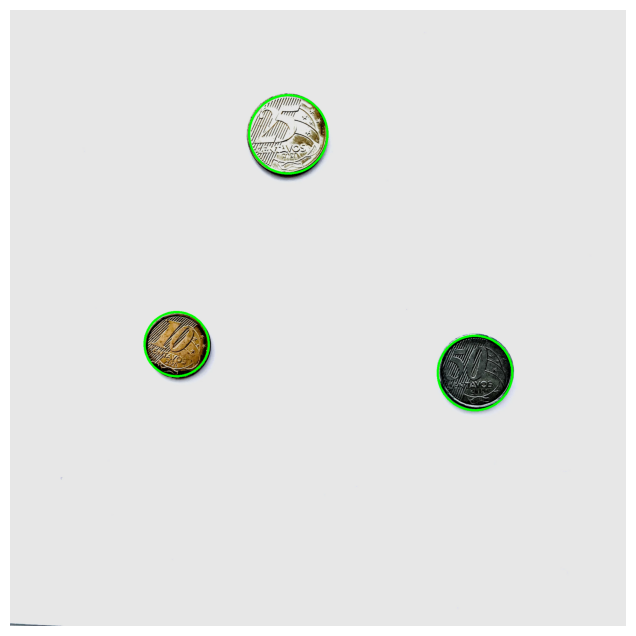

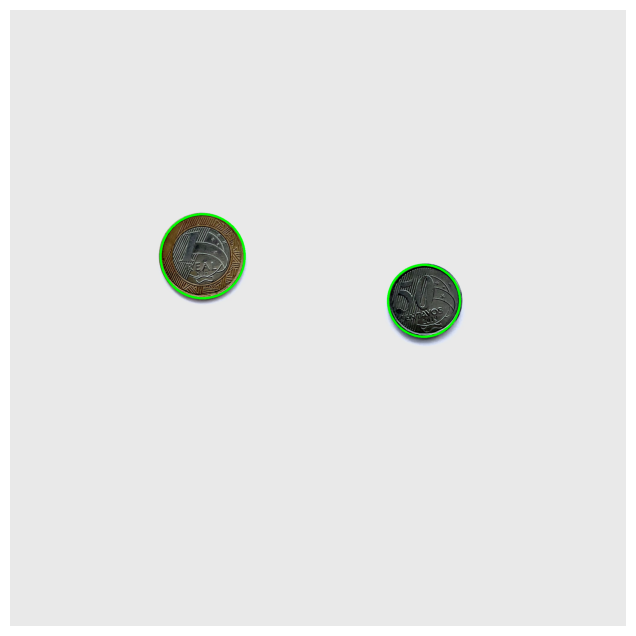

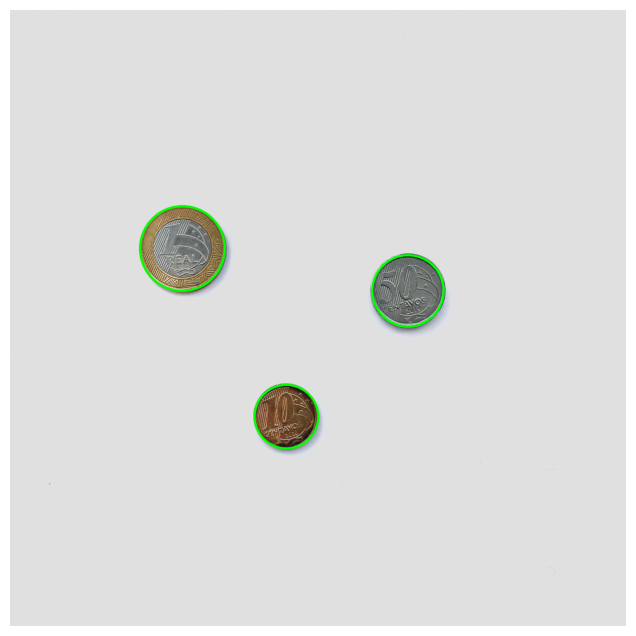

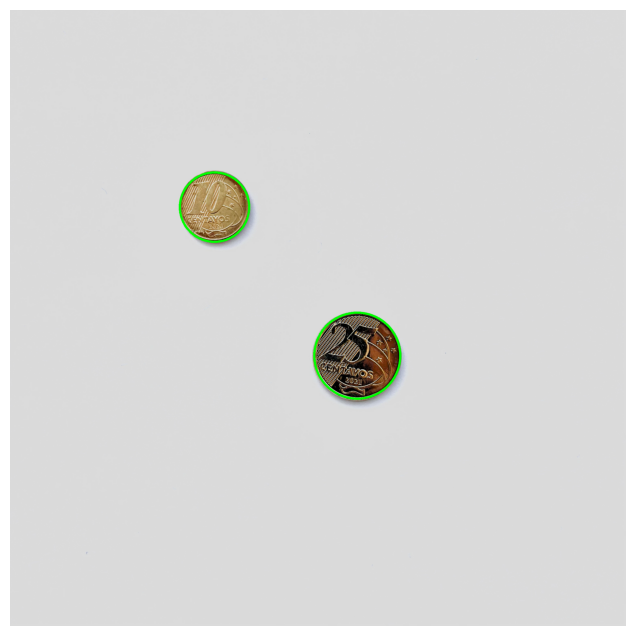

In [95]:
def filter_inner_circles(circles, max_center_distance):
    filtered_circles = []
    circle_flags = [True] * len(circles[0])

    for i, circle1 in enumerate(circles[0]):
        for j, circle2 in enumerate(circles[0]):
            if i == j or not circle_flags[i] or not circle_flags[j]:
                continue

            center_distance = np.sqrt((np.float64(circle1[0]) - np.float64(circle2[0])) ** 2 + (np.float64(circle1[1]) - np.float64(circle2[1])) ** 2)

            if center_distance <= max_center_distance:
                if circle1[2] > circle2[2]:
                    circle_flags[j] = False
                else:
                    circle_flags[i] = False

    for i, flag in enumerate(circle_flags):
        if flag:
            filtered_circles.append(circles[0, i])

    return np.array(filtered_circles)

for i in range(10):
    img = cv2.imread(f'images/img{i}.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (1920, 1920))
    #img = cv2.GaussianBlur(img, (3,3), 0)
    img_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(img_g, 200, 400)
    circles = cv2.HoughCircles(img_g, cv2.HOUGH_GRADIENT_ALT, 1, 30, param1=300, param2=0.9)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        max_center_distance = 10
        filtered_circles = filter_inner_circles(circles, max_center_distance)
        for circle in filtered_circles:
            img = cv2.circle(img, (circle[0], circle[1]), circle[2], (0, 255, 0), 6)
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.show()

In [ ]:
    #circles = cv2.HoughCircles(img_g, cv2.HOUGH_GRADIENT, 1, 30, param1=300, param2=60)
    #if circles is not None:
        #circles = np.uint16(np.around(circles))
        #for i in circles[0, :]:
            #img = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 6)

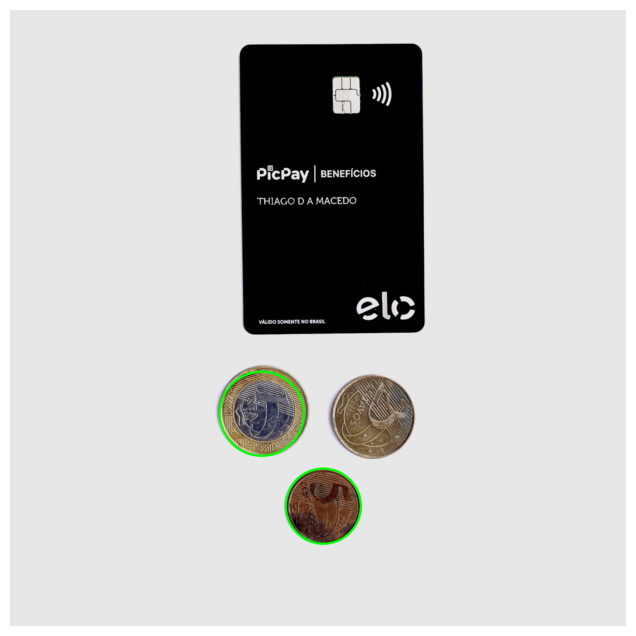

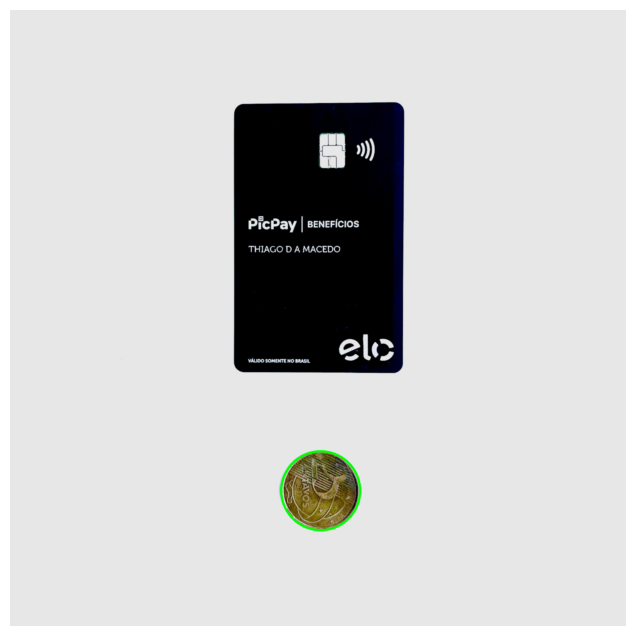

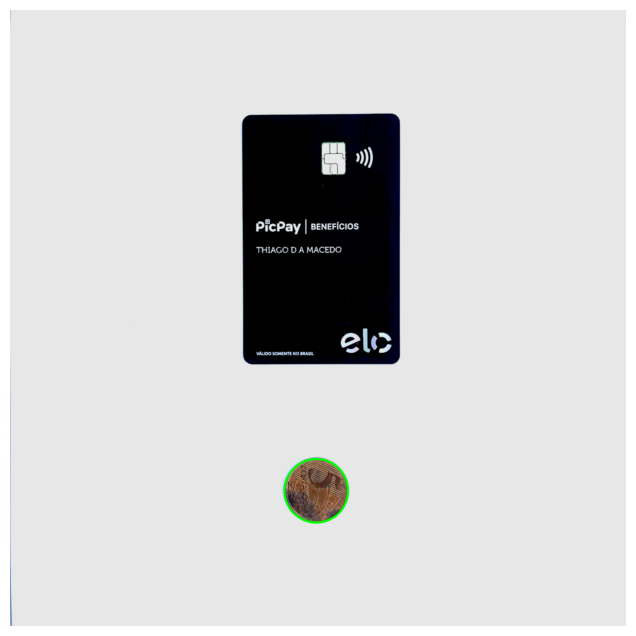

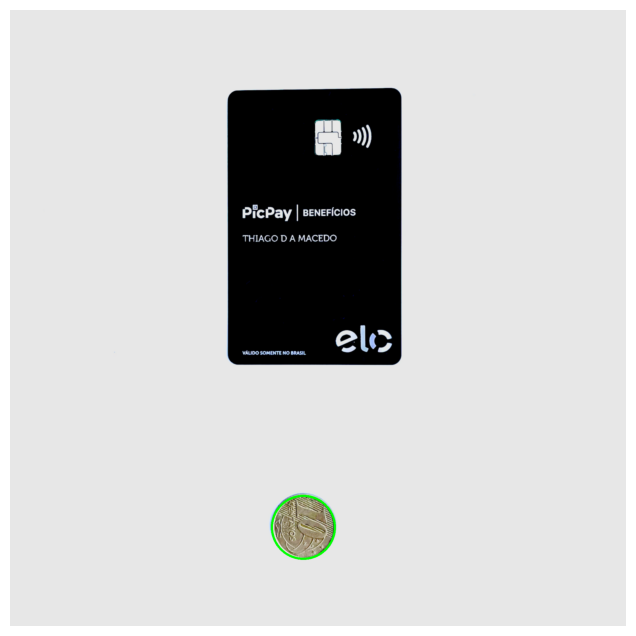

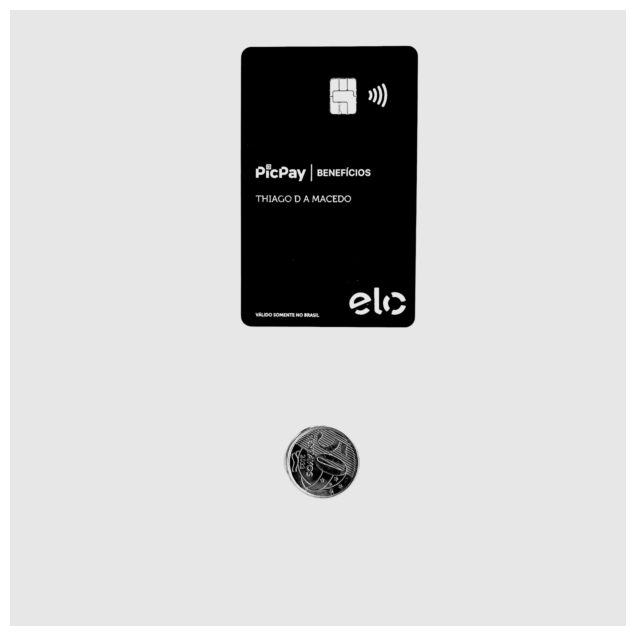

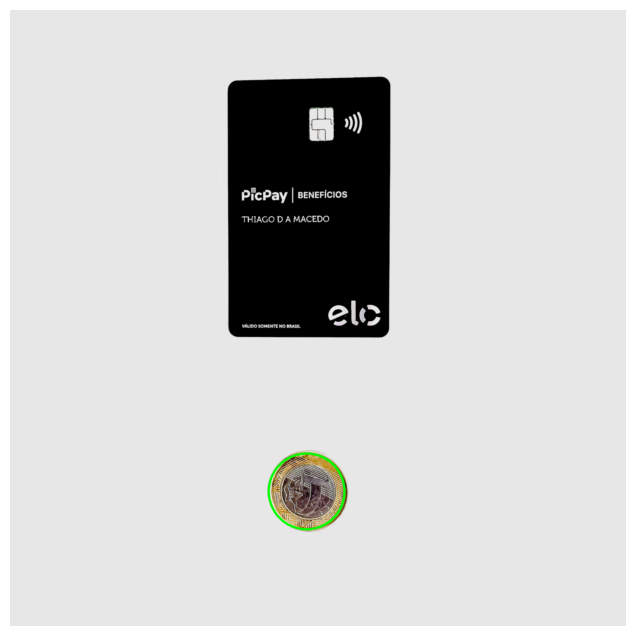

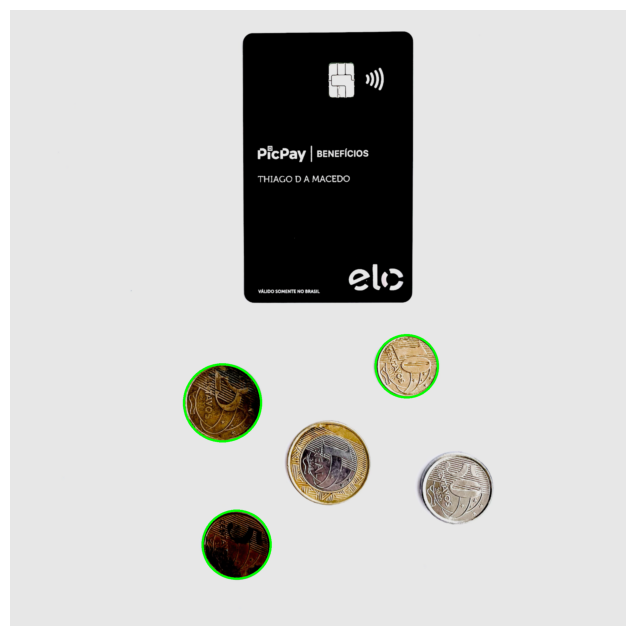

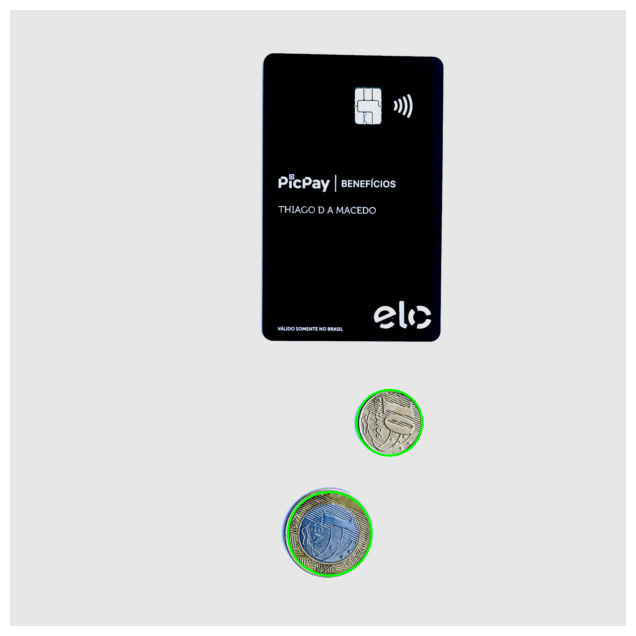

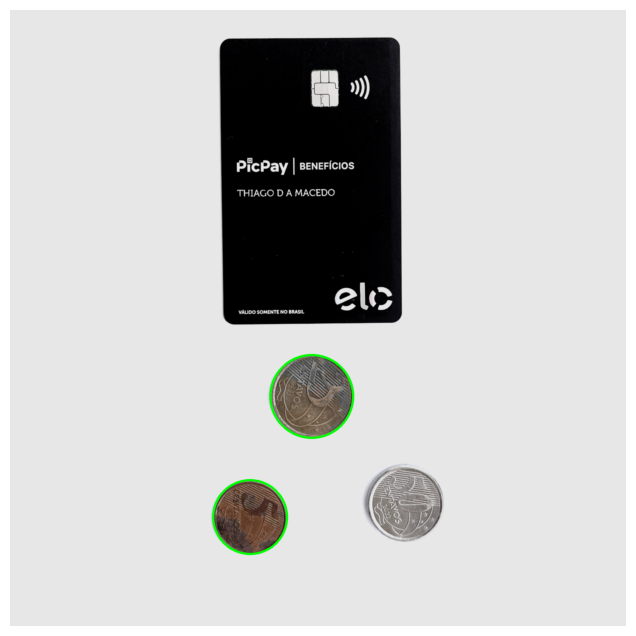

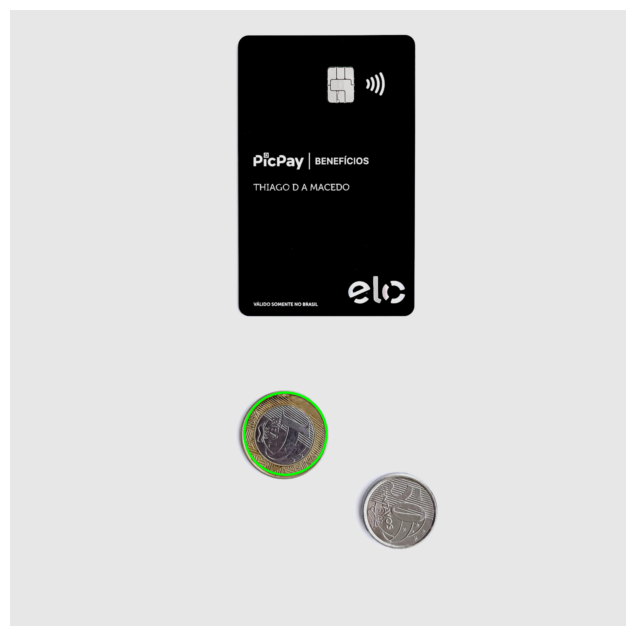

In [94]:
coin_diameters_cm = {
    '5_cents': 1.1,
    '10_cents': 1.0,
    '25_cents': 1.25,
    '50_cents': 1.15,
    '1_real': 1.35
}

coin_radius_px_list = []

for i in range(10):
    img = cv2.imread(f'imagens_cartao/img{i}.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (1920, 1920))
    img = cv2.GaussianBlur(img, (3,3), 0)
    img_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(img_g, 220, 440)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_areas = [cv2.contourArea(x) for x in contours]
    max_contour = max(contours_areas)
    for contour in contours:
        #img = cv2.drawContours(img, [contour], -1, (255, 0, 0), 4)
        if cv2.contourArea(contour) == max_contour:
            #img = cv2.drawContours(img, [contour], -1, (0, 255, 0), 8)
            x, y, w, h = cv2.boundingRect(contour)
            card_width_px, card_height_px = (w, h) if w < h else (h, w)
            ppcm_width = card_width_px / 5.398
            ppcm_height = card_height_px / 8.56
            ppcm = int((ppcm_height + ppcm_width)/2)
            coin_radius_px_list = []
            coin_radius_px = {coin: int(diameter_cm * ppcm) for coin, diameter_cm in coin_diameters_cm.items()}
            coin_radius_px_list.append(coin_radius_px)
            
            # 5 centavos 
            circles_5 = cv2.HoughCircles(img_g, cv2.HOUGH_GRADIENT, 1, 30, param1=440, param2=50, minRadius=coin_radius_px['5_cents']-2, maxRadius=coin_radius_px['5_cents']+2)
            if circles_5 is not None:
                circles_5 = np.uint16(np.around(circles_5))
                for i in circles_5[0, :]:
                    img = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 6)
                    
            # 10 centavos 
            circles_10 = cv2.HoughCircles(img_g, cv2.HOUGH_GRADIENT, 1, 30, param1=440, param2=40, minRadius=coin_radius_px['10_cents']-2, maxRadius=coin_radius_px['10_cents'])
            if circles_10 is not None:
                circles_10 = np.uint16(np.around(circles_10))
                for i in circles_10[0, :]:
                    img = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 6)
                    
            # 25 centavos 
            circles_25 = cv2.HoughCircles(img_g, cv2.HOUGH_GRADIENT, 1, 30, param1=440, param2=30, minRadius=coin_radius_px['25_cents']-2, maxRadius=coin_radius_px['25_cents']+2)
            if circles_25 is not None:
                circles_25 = np.uint16(np.around(circles_25))
                if len(circles_25[0]) > 1:
                    smallest_radius = min([circle[2] for circle in circles_25[0]])
                    smallest_circle = [circle for circle in circles_25[0] if circle[2] == smallest_radius]
                    circles_25[0] = np.array(smallest_circle)
                for i in circles_25[0, :]:
                    img = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 6)
                
            
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.show()